## <center> *Теорія Ймовірностей та Математична Статистика*
## <center> *РГР №5*
    
    
<p style="text-align: right;"> виконала: Немировська Вікторія </p>
<p style="text-align: right;"> група: ДА-01 </p>

=========================================================================================================================
## ***Завдання №1***

Проведіть первинний аналіз вибірки. Це включає статистичний ряд (для неперервних розподілів - інтервальний),
емпіричну функцію розподілу (для неперервних розподілів - інтервальну), її графік, полігон частот (для дискретних
розподілів), гістограму (для неперервних розподілів).

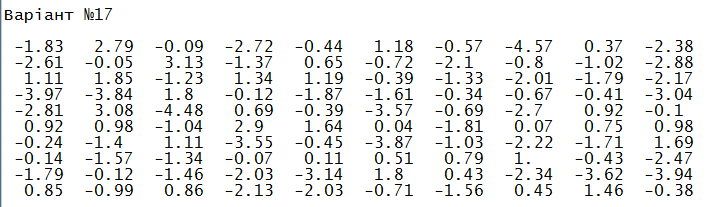

Імпортуємо бібліотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as math

pd.set_option('display.max_rows', 100)

Будуємо варіаційний ряд
$$
x_{(1)}\leq x_{(2)}\leq \ldots\leq x_{(n)}.
$$

In [3]:
data_list = []
with open('I:\\university\\2 course 2 term\\TB\\ргр\\data.txt', 'r', encoding = 'utf-8') as file:
    for line in file:
        val = [float(i) for i in line.split()]
        data_list = data_list + val
        
data_table = pd.DataFrame({"Початкові дані":  data_list,
                           "Варіаційний ряд": sorted(data_list)})
data_table

,Початкові дані,Варіаційний ряд
0,-1.83,-4.57
1,2.79,-4.48
2,-0.09,-3.97
3,-2.72,-3.94
4,-0.44,-3.87
5,1.18,-3.84
6,-0.57,-3.62
7,-4.57,-3.57
8,0.37,-3.55
9,-2.38,-3.14


## <center> *Інтервальний статистичний розподіл*

Знайдемо об'єм вибірки $n$, її мінімальний та максимальний елементи та розмах
 $$ x_{(1)} = \min_{1\leq k\leq n} x_k,\ x_{(n)} = \max_{1\leq k\leq n} x_k,\ R = x_{(n)}-x_{(1)} $$
    
Розіб'ємо значення вибірки на $m$ класів. Для вибору кількості класів $m$ застосуємо формулу Стреджеса. $$ m = 1 + [log_2 n] $$

Візьмемо однакові ширини класів, тоді ширину класу можна обчислити за формулою $$ h = \frac{x_{(n)} - x_{(1)}}{m} $$

Тепер таблиця з інформацією про вибірку має наступний вигляд:


In [4]:
data_info = pd.DataFrame({"Обє'м вибірки":        [len(data_list)],
                          "Мінімальний елемент":  [min(data_list)],
                          "Максимальний елемент": [max(data_list)],
                          "Розмах вибірки":       [max(data_list)-min(data_list)]})
data_info["Кількість класів"] = 1 + np.floor(np.log2(data_info.loc[0]["Обє'м вибірки"]))
data_info["Ширина класу"]     = data_info.loc[0]["Розмах вибірки"] / data_info.loc[0]["Кількість класів"]
      
data_info

,Обє'м вибірки,Мінімальний елемент,Максимальний елемент,Розмах вибірки,Кількість класів,Ширина класу
0,100,-4.57,3.13,7.7,7.0,1.1


Побудуємо інтервальний статичний розподіл генеральної сукупності.

In [5]:
# x1 - перший елемент варіаційного ряду
#  m - кількість класів
#  h - ширина класу
#  v - масив варіаційного ряду
x1 = data_table.loc[0]["Варіаційний ряд"]
m = int(data_info.loc[0]["Кількість класів"])
h = data_info.loc[0]["Ширина класу"]
v = np.array(sorted(data_list))

# знаходимо кінці класів
endpoints = [np.around(x1 + i*h, decimals=2) for i in range(m + 1)]

# заповнюємо значення початків та кінців проміжків класів
classes = [f'[{endpoints[i]}, {endpoints[i+1]})' for i in range(m - 1)]
classes.append(f'[{endpoints[m-1]}, {endpoints[m]}]')

# знаходимо середину класів
middle = [np.around(0.5*(endpoints[i] + endpoints[i+1]), decimals=2) for i in range(m)]

# знаходимо частоти потрапляння елементів у відповідні класи
freq = [v[(endpoints[i] <= v) & (v < endpoints[i+1])].size for i in range(m-1)]
freq.append(v[(endpoints[m-1] <= v) & (v <= endpoints[m])].size)
freq = np.array(freq)

# формуємо таблицю інтервального статистичного розподілу
data_stat_distr = pd.DataFrame({"Класи": classes,
                                "Середини класів": middle,
                                "Частоти": freq,
                                "Кумулятивні частоти": freq.cumsum(),
                                "Відносні частоти": freq / len(data_list),
                                "Кумулятивні відносні частоти": freq.cumsum() / len(data_list)})
data_stat_distr

,Класи,Середини класів,Частоти,Кумулятивні частоти,Відносні частоти,Кумулятивні відносні частоти
0,"[-4.57, -3.47)",-4.02,9,9,0.09,0.09
1,"[-3.47, -2.37)",-2.92,9,18,0.09,0.18
2,"[-2.37, -1.27)",-1.82,22,40,0.22,0.40
3,"[-1.27, -0.17)",-0.72,20,60,0.20,0.60
4,"[-0.17, 0.93)",0.38,22,82,0.22,0.82
5,"[0.93, 2.03)",1.48,14,96,0.14,0.96
6,"[2.03, 3.13]",2.58,4,100,0.04,1.00


## <center> *Емпірична функція розподілу*

Побудуємо емпіричну функцію розподілу на основі інтервального статистичного розподілу.
    
$$
    F_n^*(x)=\left\{
    \begin{array}{ll}
    0, & x\leq -4.57, \\
    0.09, & -4.57 < x\leq -3.47, \\
    0.18, & -3.47 < x\leq -2.37, \\
    0.40, & -2.37 < x\leq -1.27, \\
    0.60, & -1.27 < x\leq -1.07, \\
    0.82, & -1.07 < x\leq 0.93, \\
    0.96, & 0.93 < x\leq 2.03, \\
    1, & x > 2.03, \\
    \end{array}\right.
$$

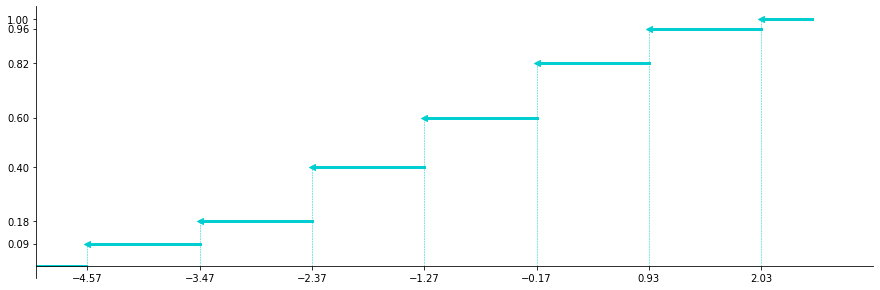

In [7]:
def plot_empirical_cdf(x, y):
    plt.plot([x[0] - 0.5, x[0]], [0, 0], linewidth=2, color="darkturquoise")
    for i in range(len(x)-1):
        plt.plot([x[i], x[i+1]], [y[i], y[i]], linewidth=3, color="darkturquoise")
        plt.scatter(x[i], y[i], marker="<", color="darkturquoise")
        plt.vlines(x[i], ymin=0, ymax=y[i], linewidth=0.5, color="darkturquoise", linestyles="dashed")
    plt.plot([x[len(x)-1], x[len(x)-1] + 0.5], [1, 1], linewidth=3, color="darkturquoise")
    plt.scatter(x.max(), 1, marker="<", color="darkturquoise")
    plt.vlines(x.max(), ymin=0, ymax=1, linewidth=0.5, color="darkturquoise", linestyles="dashed")
    plt.show()
    
endpoints = np.array(endpoints)

fig, ax = plt.subplots(figsize = (15, 5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.set_xlim(endpoints.min() - 0.5, endpoints.max())
ax.set_xticks(endpoints[:-1])
ax.set_yticks(data_stat_distr["Кумулятивні відносні частоти"])

plot_empirical_cdf(endpoints[:-1], data_stat_distr["Кумулятивні відносні частоти"])

## <center> *Гістограма скоригованих відносних частот*
    
Для того щоб гістограма наближала щільність розподілу генеральної сукупності, побудуємо гістограму скоригованих відносних частот. Тоді висота сотвпців визначається як: $$ h_k = \frac{\nu_k}{l(\Delta_k)}, $$ де $\nu_k$ - відносні частоти, $l(\Delta_k)$ - довжина інтервалу.

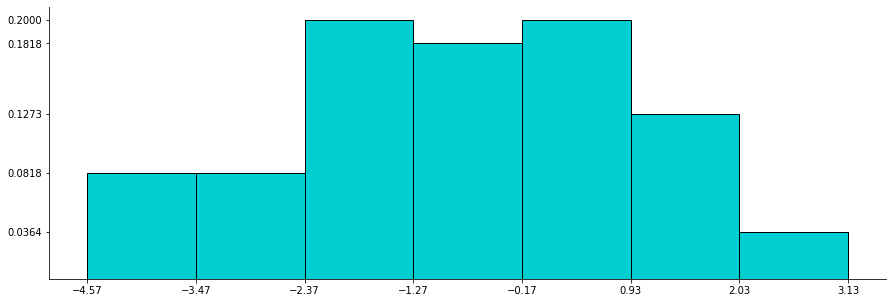

In [8]:
h_arr = [data_stat_distr.loc[i]["Відносні частоти"]/h for i in range (m)]
h_arr = np.unique(h_arr)

fig, ax = plt.subplots(figsize = (15, 5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.set_xticks(endpoints)
ax.set_yticks(h_arr)

ax.hist(data_table["Варіаційний ряд"], bins = m, density = True, color = "darkturquoise", edgecolor = "black")
plt.show()

Виходячи з побудованих емпіричної функції та гістограми можна, візуально оцінивши, висунути початкове припущення, що дана генеральна сукупність має нормальний розподіл. По-переше, на емпіричній функції розподілу прослідковуються більші стрибки кумулятивних частот у центрі графіку ніж на кінцях. По-друге, гістограма скоригованих відносних частот візуально найбільше схожа відомий нам нормальний розподіл.

=========================================================================================================================


## ***Завдання №2***

Знайдіть вибіркове середнє, вибіркову дисперсію, виправлену вибіркову дисперсію, вибіркову медіану, вибіркову моду, вибіркові коефіцієнти асиметрії та ексцесу.

## <center> *Міри центральної тенденції*

Обчислимо *вибіркове середнє* для групованих даних. Для цього скористаємося формулою: 
$$ \bar x = \frac 1n \sum_{i=1}^{m}n_ix_i^*=\sum_{i=1}^{m}\nu_ix_i^* $$

In [9]:
# обчислюємо вибіркове середнє за вибіркою використоючи бібліотечну функцію mean
data_char = pd.DataFrame({"Вибіркове середнє (за виб.)": [np.mean(data_table["Варіаційний ряд"])]})

# обчислюємо вибіркове середнє за ІСР використовючи відповідну формулу та відомі дані
data_char["Вибіркове середнє (за ІСР)"] = np.sum(data_stat_distr["Відносні частоти"] * data_stat_distr["Середини класів"])

Обчислимо *вибіркову медіану* для групованих даних. Для цього використаємо формулу:

$$ Me^*\xi = y_{me-1}+h \cdot \frac {\frac n2 - n_{me-1}^*}{n_{me}}, $$

де $me$ - номер класу, що містить елемент, який відповідає медіані, $h$ - ширина класів, $y_{me-1}$ та $n_{me}$ - нижня межа та частота класу, що містять медіану.

Для знаходження класу, що містить елемент, який відповідає медіані скористаємося настпними нерівностями

$$ n_{me-1}^* < \frac n2,\ n_{me}^* \geq \frac n2 , $$
де $n_k^*$ - кумулятивна частота $k$-го класу.

In [10]:
# обчислюємо вибіркову медіану за вибіркою використовючи бібліотечну функцію median
data_char["Вибіркова медіана (за виб.)"] = np.median(data_table["Варіаційний ряд"])

# обчислюємо вибіркову медіану за ІСР використовючи відповідну формулу та відомі дані
me = data_stat_distr["Кумулятивні частоти"][data_stat_distr["Кумулятивні частоти"] < len(data_list)/2].size
if me == 0:
    data_char["Вибіркова медіана (за ІСР)"] = endpoints[me] + h * (len(data_list)/2) / data_stat_distr["Частоти"][me]
else:
    data_char["Вибіркова медіана (за ІСР)"] = endpoints[me] + h * (len(data_list)/2 - data_stat_distr["Кумулятивні частоти"][me-1]) / data_stat_distr["Частоти"][me]

Обчислимо *вибіркову моду* використовуючи наступний вираз

$$ Mo^*\xi = y_{mo-1} + h \cdot \frac{n_{mo} - n_{mo-1}}{(n_{mo} - n_{mo-1}) + (n_{mo} - n_{mo+1})}, $$

де $y_{mo-1}$ - нижня межа модального класу, $n_{mo},\ n_{mo-1},\ n_{mo+1}$ - частоти модального, передмодального та післямодального класів.

In [11]:
# обчислюємо вибіркову моду використовючи відповідну формулу та відомі дані
mo = np.argwhere(data_stat_distr["Частоти"].tolist() == np.amax(data_stat_distr["Частоти"]))

for i in range (len(mo)):
    if mo[i] == 0:
        data_char["Вибіркова мода " + str(i+1)] = endpoints[mo[i]] + h * freq[mo[i]] / (2*freq[mo[i]] - freq[mo[i]+1])
    elif mo[i] == m-1:
        data_char["Вибіркова мода " + str(i+1)] = endpoints[mo[i]] + h * (freq[mo[i]] - freq[mo[i]-1]) / (2*freq[mo[i]] - freq[mo[i]-1])
    else:
        data_char["Вибіркова мода " + str(i+1)] = endpoints[mo[i]] + h * (freq[mo[i]] - freq[mo[i]-1]) / (2*freq[mo[i]] - freq[mo[i]-1] - freq[mo[i]+1])
    
    
data_char

,Вибіркове середнє (за виб.),Вибіркове середнє (за ІСР),Вибіркова медіана (за виб.),Вибіркова медіана (за ІСР),Вибіркова мода 1,Вибіркова мода 2
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05


## <center> *Міри розсіювання*

Розрахуємо *вибіркову дисперсію* та *виправлену вибіркову дисперсію*.
Для групованих данних скористуємося формулами:
$$ \mathbb{D}_{\xi}^{**} = \sum_{i=1}^m \nu_i (x_i^* - \bar x)^2 $$ $$ \mathbb{D}_{\xi}^{***} = \frac{n}{n-1} \sum_{i=1}^m \nu_i (x_i^* - \bar x)^2 $$

In [12]:
# обчислюємо вибіркову дисперсію за вибіркою використовючи бібліотечну функцію var
data_char["Вибіркова дисперсія (за виб.)"] = np.var(data_table["Варіаційний ряд"])
# обчислюємо вибіркову дисперсію за ІСР використовючи описану формулу та відомі данні
data_char["Вибіркова дисперсія (за ІСР)"] = np.sum(data_stat_distr["Відносні частоти"] * (data_stat_distr["Середини класів"] - data_char.loc[0]["Вибіркове середнє (за ІСР)"]) ** 2)

# обчислюємо виправлену вибіркову дисперсію за вибіркою використовючи бібліотечну функцію var
data_char["Виправлена вибіркова дисперсія (за виб.)"] = np.var(data_table["Варіаційний ряд"], ddof=1)
# обчислюємо виправлену вибіркову дисперсію за ІСР використовючи описану формулу та відомі данні
data_char["Виправлена вибіркова дисперсія (за ІСР)"] = len(data_list)/(len(data_list)-1) * data_char["Вибіркова дисперсія (за ІСР)"]

data_char

,Вибіркове середнє (за виб.),Вибіркове середнє (за ІСР),Вибіркова медіана (за виб.),Вибіркова медіана (за ІСР),Вибіркова мода 1,Вибіркова мода 2,Вибіркова дисперсія (за виб.),Вибіркова дисперсія (за ІСР),Виправлена вибіркова дисперсія (за виб.),Виправлена вибіркова дисперсія (за ІСР)
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05,3.064197,3.058275,3.095148,3.089167


## <center> *Міри форми*

Для характеристики міри симетричності розподілу даних обчислимо *вибірковий коефіцієнт асиметрії*:
$$ As^*\xi = \frac{\mu_{3,0}^*}{(\sigma_{\xi}^{***})^3} $$

Для характеристики міри гостровершинності визначимо *вибірковий коефіцієнт ексцесу*:
$$ Ex^*\xi = \frac{\mu_{4,0}^*}{(\sigma_{\xi}^{***})^4} - 3 $$

Де $\mu_{k,0}^*$ - *вибірковий центральний момент* $k$-го порядку.\
Для групованих даних вибірковий центральний момент буде обчислюватися наступним чином:
$$ \mu_{k,0}^* = \frac 1n \sum_{i=1}^{m}n_i(x_i^* - \bar x)^k =\sum_{i=1}^{m}\nu_i(x_i^* - \bar x)^k $$

In [13]:
# обчислюємо вибірковий коефіцієнт асиметрії за вибіркою використовючи бібліотечну функцію skew
data_char["Вибірковий коефіцієнт асиметрії (за виб.)"] = stats.skew(data_table["Варіаційний ряд"])
# обчислюємо вибірковий коефіцієнт асиметрії за ІСР використовючи описані формули
mu_3 = np.sum(data_stat_distr["Відносні частоти"] * (data_stat_distr["Середини класів"] - data_char.loc[0]["Вибіркове середнє (за ІСР)"]) ** 3)
data_char["Вибірковий коефіцієнт асиметрії (за ІСР)"] = mu_3 / ((data_char["Виправлена вибіркова дисперсія (за ІСР)"])**(3/2))

# обчислюємо вибірковий коефіцієнт ексцесу за вибіркою використовючи бібліотечну функцію kurtosis
data_char["Вибірковий коефіцієнт ексцесу (за виб.)"] = stats.kurtosis(data_table["Варіаційний ряд"])
# обчислюємо вибірковий коефіцієнт асиметрії за ІСР використовючи описані формули
mu_4 = np.sum(data_stat_distr["Відносні частоти"] * (data_stat_distr["Середини класів"] - data_char.loc[0]["Вибіркове середнє (за ІСР)"]) ** 4)
data_char["Вибірковий коефіцієнт ексцесу (за ІСР)"] = mu_4 / ((data_char["Виправлена вибіркова дисперсія (за ІСР)"])**2) - 3

data_char

,Вибіркове середнє (за виб.),Вибіркове середнє (за ІСР),Вибіркова медіана (за виб.),Вибіркова медіана (за ІСР),Вибіркова мода 1,Вибіркова мода 2,Вибіркова дисперсія (за виб.),Вибіркова дисперсія (за ІСР),Виправлена вибіркова дисперсія (за виб.),Виправлена вибіркова дисперсія (за ІСР),Вибірковий коефіцієнт асиметрії (за виб.),Вибірковий коефіцієнт асиметрії (за ІСР),Вибірковий коефіцієнт ексцесу (за виб.),Вибірковий коефіцієнт ексцесу (за ІСР)
0,-0.7382,-0.775,-0.62,-0.72,-1.416667,0.05,3.064197,3.058275,3.095148,3.089167,-0.052196,-0.139914,-0.498964,-0.775696


=========================================================================================================================


## ***Завдання №3***

Обґрунтуйте та висуньте (нову) гіпотезу про розподіл генеральної сукупності.

Взявши до уваги нові отримані дані, переглянемо висунуту гіпотезу щодо розподілу генеральної сукупності.

***1.*** Нехай $\xi \simeq U(a,b)$, тоді 
$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \frac{1}{b-a}, & x\in [a, b], \\
    0, & x\notin [a, b] \\
    \end{array}\right.
$$

З відомих нам данних можна зробити припущення, що $a=-4.57,\ b=3.13$. Запишемо щільність розподілу.

$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \frac{1}{7.7}, & x\in [-4.57, 3.13], \\
    0, & x\notin [-4.57, 3.13] \\
    \end{array}\right.
$$

Для рівномірного розпоідлу: $ \mathbb E\xi = \frac{a+b}{2}=-0.72,\ \mathbb D\xi = \frac{(b-a)^2}{12} $

Обчислимо коефіцієнт асиметрії:

$ As\xi=\frac{\mu_3(\xi)}{\sigma_{\xi}^3} $

$ \mu_3(\xi) = \int_{-\infty}^{+\infty} (x - \mathbb E\xi)^3 f_{\xi}(x)dx = \int_{-4.57}^{3.13} (x + 0.72)^3 \cdot \frac{1}{7.7}dx = 0 \Rightarrow As\xi=0$


Обчислимо коефіцієнт ексцесу:

$ Ex\xi=\frac{\mu_4(\xi)}{\sigma_{\xi}^4}-3 $

$ \mu_4(\xi) = \int_{-\infty}^{+\infty} (x - \mathbb E\xi)^4 f_{\xi}(x)dx = \int_{-4.57}^{3.13} (x + 0.72)^4 \cdot \frac{1}{7.7}dx = 43.9413 $

$ \sigma_{\xi}^4 = (\frac{(b-a)^2}{12})^2 = \frac{7.7^4}{144} = 24.4118 $

Звідси отримуємо, що:

$ Ex\xi=\frac{43.9413}{24.4118}-3 = -1.2 $

Тоді для рівномірного розподілу $As\xi = 0,\ Ex\xi = -1.2 $. 

***2.*** Нехай $\xi \simeq Exp(\lambda)$, тоді 
$$
f_{\xi}(x) = \left\{
    \begin{array}{ll}
    \lambda e^{-\lambda x}, & x\geq 0, \\
    0, & x < 0 \\
    \end{array}\right.
$$

Відомо, що $\mathbb E \xi = \frac 1\lambda = \bar x = -0.775$. $\lambda \approx -1.29. $

Насправді одразу можна побачити, що $\bar x < 0$, тобто $\lambda < 0$, отже дана генеральна сукупність не може мати експоненційний розподіл.


***3.*** Нехай $\xi \simeq N(a,\ \sigma^2)$, тоді 
$$
f_{\xi}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-a)^2}{2 \sigma^2}},\ x \in \mathbb R
$$

Тоді $a \approx \bar x = -0.775,\ \sigma^2 \approx \mathbb D_{\xi}^{**} = 3.058275$. Для нормального розподілу коефіцієнти асиметрії та ексцесу мають бути рівними нулю $As\xi = 0,\ Ex\xi = 0$.

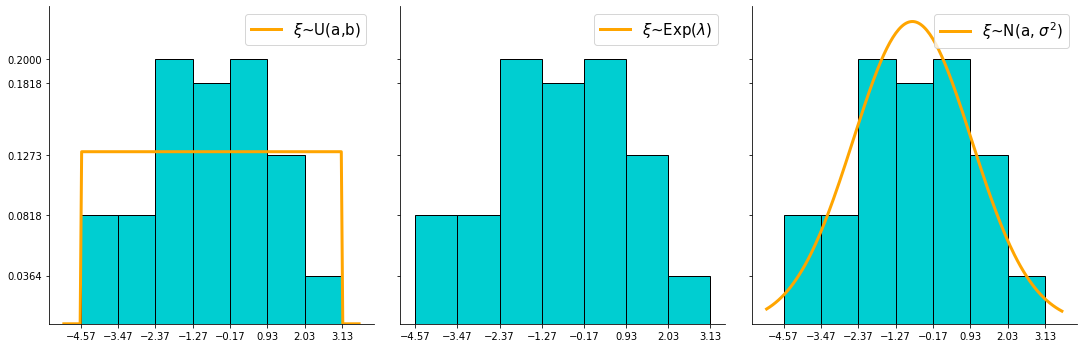

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_position("zero")
    ax[i].set_xticks(endpoints)
    ax[i].set_yticks(h_arr)
    
x = np.linspace(data_info.loc[0]["Мінімальний елемент"]-0.5, data_info.loc[0]["Максимальний елемент"]+0.5, num=200)
y0 = stats.uniform.pdf(x, loc=data_info.loc[0]["Мінімальний елемент"], scale=data_info.loc[0]["Розмах вибірки"])
y1 = stats.expon.pdf(x, loc=0, scale=data_char.loc[0]["Вибіркове середнє (за ІСР)"])
y2 = stats.norm.pdf(x, loc=data_char.loc[0]["Вибіркове середнє (за ІСР)"], scale=math.sqrt(data_char.loc[0]["Вибіркова дисперсія (за ІСР)"]))


ax[0].hist(data_table["Варіаційний ряд"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[0].plot(x, y0, linewidth=3, color="orange", label=r"$\xi$~U(a,b)")
ax[0].legend(fontsize=15)

ax[1].hist(data_table["Варіаційний ряд"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[1].plot(x, y1, linewidth=3, color="orange", label=r"$\xi$~Exp($\lambda$)")
ax[1].legend(fontsize=15)

ax[2].hist(data_table["Варіаційний ряд"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[2].plot(x, y2, linewidth=3, color="orange", label=r"$\xi$~N(a, $\sigma^2$)")
ax[2].legend(fontsize=15)

plt.show()

Розподіл є неперервним, полімодальним.

Одразу можна відкинути варіант експоненційного розподілу, оскільки вибіркове середнє менше нуля (саме тому графік не відображено на малюнку). До того ж вибірка має від'ємні значення.

Якщо розглянути побудовані графіки функції нормального розподілу та гістограму, можна побачити що вони не погано вписуються. Крім цього значення вибіркового коефіцієнту симетрії є близькими до нуля, що може свідчити про нормальний розподіл. Проте з іншої сторони вибірковий коефіцієнт ексцесу є однаково близьким як до очікуваного значення для нормального розподілу, так і до очікуваного значення рівномірного розподілу. Хоча у завданні сказано що обрані сукупності розподілів можуть бути лише нормального та експоненційного типу, не можна відкинути гіпотезу про те що розподіл є рівномірним.

Отже очікування про нормальний розподіл генеральної сукупності підтвердилися, але ще додалася гіпотеза про рівномірний розподіл.

=========================================================================================================================


## ***Завдання №4***
Методом моментів та методом максимальної вірошідності знайдіть оцінки параметрів розподілу.

## <center> *Метод моментів*
    
Виконаємо оцінку параметрів генеральної сукупності *за методом моментів* для двох гіпотез:

***1.*** $\xi \simeq U(a,b),\ \vec \theta = (a, b)$

Оскільки для рівномірного розподілу $ \mathbb E\xi = \frac{a+b}{2},\ \mathbb D\xi = \frac{(b-a)^2}{12} $ і при цьому $\bar \xi$ - вибіркове середнє (за ІСР), $\mathbb D_{\xi}^{**}$ - вибіркова дисперсія (за ІСР), то можна скласти систему рівнянь:

$
\left\{
    \begin{array}{ll}
    \frac{a^* + b^*}{2} = \bar \xi \\
    \frac{(b^* - a^*)^2}{12} = \mathbb D_{\xi}^{**} \\
    \end{array}\right. \Rightarrow
$
$
\left\{
    \begin{array}{ll}
    a^* + b^* = 2\bar \xi \\
    b^* - a^* = \sqrt{12\mathbb D_{\xi}^{**}} \\
    \end{array}\right. \Rightarrow
$
$
\left\{
    \begin{array}{ll}
    a^* = \bar \xi - \sqrt{3\mathbb D_{\xi}^{**}} \\
    b^* = \bar \xi + \sqrt{3\mathbb D_{\xi}^{**}} \\
    \end{array}\right.
$

Звідси з відомих нам значень вибіркового середнього та вибіркової дисперсії можна прорахувати:

$a^* = -0.775 - \sqrt{3 \cdot 3.058275} = -3.804$

$b^* = -0.775 + \sqrt{3 \cdot 3.058275} = 2.254$

Одразу можна помітити, що даний інтервал далеко не охоплює всю вибірку. 

***2.*** $\xi \simeq N(a,\sigma^2),\ \vec \theta = (a, \sigma^2)$

Оскільки для нормального розподілу $ \mathbb E\xi = a,\ \mathbb D\xi = \sigma^2 $ і при цьому $\bar \xi$ - вибіркове середнє (за ІСР), $\mathbb D_{\xi}^{**}$ - вибіркова дисперсія (за ІСР), то одразу видно, що:

$a^* = \bar \xi = -0.775$

$(\sigma^2)^* = \mathbb D_{\xi}^{**} = 3.058275$

## <center> *Метод максимальної вірогідності*
    
Знову ж таки розглянемо дві висунуті гіпотези щодо розподілу генеральної сукупності та виконаємо оцінку параметрів цих розподілів за *методом максимальної вірогідності*.

***1.*** $\xi \simeq U(a,b),\ \vec \theta = (a, b)$

Спочатку запишемо щільність: 
$$
f_{\xi}(x_i;\ a, b) = \left\{
    \begin{array}{ll}
    \frac{1}{b-a}, & x_i \in [a, b] \\
    0 & x_i \notin [a, b] \\
    \end{array}\right.
$$

Тоді функція вірогідності записується як: 
$$
L(x_1,\ x_2, ... x_n;\ a, b) = \prod_{i=1}^n f_{\xi}(x_i;\ a, b) = \left\{
    \begin{array}{ll}
    (\frac{1}{b-a})^n, & для\ усіх\ x_i \in [a, b] \\
    0, & якщо\ хоча\ б\ один\ x_i \notin [a, b] \\
    \end{array}\right.
$$

Проаналізувавши, можна сказати що, дана функція вірогідності досягає свого максимального значення при мінімальному значенні знаменника дробу $b-a$, причому всі значення реалізації $x_i$ мають потрапляти у цей проміжок. Тоді мінімальний за шириною проміжок, що відповідає цьому критерію буде $[a^*,b^*]$, де $a^* = \min_{1\leq i\leq n} (x_i),\ b^* = \max_{1 \leq i \leq n} (x_i)$.



***2.*** $\xi \simeq N(a,\sigma^2),\ \vec \theta = (a, \sigma^2)$

Запишемо щільність для даного розподілу: 
$$ f_{\xi}(x_i;\ a, b) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x_i-a)^2}{2 \sigma^2}} $$

Тоді функція вірогідності записується як: 
$$ L(x_1,\ x_2, ... x_n;\ a, b) = \prod_{i=1}^n f_{\xi}(x_i;\ a, \sigma^2) = (\frac{1}{\sigma\sqrt{2 \pi}})^n \cdot e^{-\frac{1}{2 \sigma^2}\sum_{i=1}^n (x_i - a)^2} $$

Отриману функцію варто прологарифмувати для подальшої роботи з нею. Оскільки логарифм є монотонною функцією, отримана прологарифмована функція буде мати максимум у тих самих точках, що і початкова.

Проведемо обчислення.

$$
\ln L = n \cdot \ln{|\frac{1}{\sigma \sqrt{2\pi}}|} + \ln(e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2}) = \frac n2 \cdot \ln{\frac{1}{2\pi\sigma^2}} - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2
$$

Для знаходження критичної точки за параметром $a$, візьмемо першу частинну похідну:

$ \frac{\partial}{\partial a} \ln L = -\frac{1}{2\sigma^2} \frac{\partial}{\partial a} \sum_{i=1}^n (x_i - a)^2 = -\frac{1}{2\sigma^2} \sum_{i=1}^n -2(x_i - a) = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) $

Прирівняємо її до нуля і отримаємо:

$ \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = 0 $

$ -na + \sum_{i=1}^n x_i = 0 $

$ a = \frac1n \sum_{i=1}^n x_i  $

Можна помітити, що насправді знайдена величина є вибірковми середнім $ a^* = \bar \xi $.

Знайдемо критичну точку за параметром $\sigma^2$, візьмемо першу частинну похідну:

$ \frac{\partial}{\partial \sigma^2} \ln L = \frac{\partial}{\partial \sigma^2} (\frac n2 \cdot \ln{\frac{1}{2\pi}} - \frac n2 \ln{\sigma^2} - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2) = - \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 $

Прирівняємо її до нуля:

$ - \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 = 0 $

$ \frac{n}{2\sigma^2} = \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2 $

$ \sigma^2 = \frac1n \sum_{i=1}^n (x_i - a)^2  $

Оскільки $ a^* = \bar \xi $, то $ (\sigma^2)^* = \frac1n \sum_{i=1}^n (x_i - a^*)^2 = \frac1n \sum_{i=1}^n (x_i - \bar \xi)^2 = \mathbb D_{\xi}^{**} $

Перевіримо, що знайдена нами точка екстремуму дійсно є точкою мінімуму. Для цього знайдемо другі частинні похідні і запишемо матрицю Гесе.

$ \frac{\partial^2}{\partial a^2} \ln L = \frac{\partial}{\partial a} \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = - \frac{n}{\sigma^2} $;

$ \frac{\partial^2}{\partial a \partial \sigma^2} \ln L = \frac{\partial}{\partial \sigma^2} \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) = 0 $;

$ \frac{\partial^2}{\partial (\sigma^2)^2} \ln L = \frac{\partial}{\partial \sigma^2} (- \frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^n (x_i - a)^2) = \frac{n}{2(\sigma^2)^2} - \frac{1}{(\sigma^2)^3}\sum_{i=1}^n (x_i - a)^2 $.

Підставимо критичні точки і отримаємо:

$
H(\ln L) = \begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{1}{(\mathbb D_{\xi}^{**})^3}\sum_{i=1}^n (x_i - \bar \xi)^2
\end{pmatrix} = 
$
$
\begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{n}{(\mathbb D_{\xi}^{**})^3}\frac 1n \sum_{i=1}^n (x_i - \bar \xi)^2
\end{pmatrix} = 
$

$
= \begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & \frac{n}{2(\mathbb D_{\xi}^{**})^2} - \frac{2n\mathbb D_{\xi}^{**}}{2(\mathbb D_{\xi}^{**})^3}
\end{pmatrix} = 
$
$
\begin{pmatrix}
- \frac{n}{\mathbb D_{\xi}^{**}} & 0 \\
0 & -\frac{n}{2(\mathbb D_{\xi}^{**})^2}
\end{pmatrix}
$

Дана матриця є відємно визначеною, тому функція вірогідності має мінімум у точках очінки $ a^* = \bar \xi $ та $ (\sigma^2)^* = \mathbb D_{\xi}^{**} $.

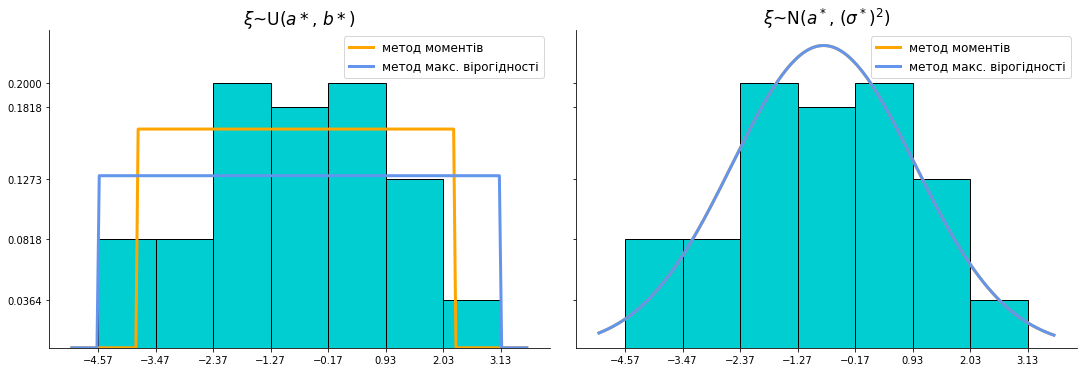

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
fig.tight_layout()

for i in range(2):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_position("zero")
    ax[i].set_xticks(endpoints)
    ax[i].set_yticks(h_arr)
    
x = np.linspace(data_info.loc[0]["Мінімальний елемент"]-0.5, data_info.loc[0]["Максимальний елемент"]+0.5, num=200)
y0 = stats.uniform.pdf(x, loc=-3.804, scale=2.254+3.804)
yy0 = stats.uniform.pdf(x, loc=data_info.loc[0]["Мінімальний елемент"], scale=data_info.loc[0]["Розмах вибірки"])
y1 = stats.norm.pdf(x, loc=data_char.loc[0]["Вибіркове середнє (за ІСР)"], scale=math.sqrt(data_char.loc[0]["Вибіркова дисперсія (за ІСР)"]))
yy1 = stats.norm.pdf(x, loc=data_char.loc[0]["Вибіркове середнє (за ІСР)"], scale=math.sqrt(data_char.loc[0]["Вибіркова дисперсія (за ІСР)"]))

ax[0].hist(data_table["Варіаційний ряд"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[0].plot(x, y0, linewidth=3, color="orange", label="метод моментів")
ax[0].plot(x, yy0, linewidth=3, color="cornflowerblue", label="метод макс. вірогідності")
ax[0].set_title(r"$\xi$~U($a*$, $b*$)", fontsize=17)
ax[0].legend(fontsize=12, loc="upper right")

ax[1].hist(data_table["Варіаційний ряд"], bins=m, density=True, color="darkturquoise", edgecolor="black")
ax[1].plot(x, y1, linewidth=3, color="orange", label="метод моментів")
ax[1].plot(x, yy1, linewidth=3, color="cornflowerblue", label="метод макс. вірогідності")
ax[1].set_title(r"$\xi$~N($a^*$, $(\sigma^*)^2$)", fontsize=17)
ax[1].legend(fontsize=12, loc="upper right")

plt.show()

Виходячи з отриманих результатів я все ж таки вважаю, що генеральна сукупність має нормальний розподіл. Це додатково підтверджують проведені оцінки параметрів розподілів. Для нормального розподілу отримано однакові значення як за методом моментів, так і за методом максимальної правдоподібності. Другий мені здається досить стверджувальним. Щодо гіпотези про рівномірний розподіл, то я важаю що її можна відкинути, оскільки за методом моментів отримано результати, які сильно відрізняються від тих значень, що були отримані шляхом оцінки за методом максимальної вірогідності. До того ж оцінені параметри  утворюють проміжок, що не включає у себе значну частину даних з вибірки. 